# 1 - Title: Time Series Analysis on Sales Data

> Objective :

- Pada Project Kali ini saya akan membuat model untuk melakukan forecasting Sales data Pada periode yang akan datang.

> Dataset : `sample_dataset_timeseries_noarea.csv`

> Dataset Information:

- week_number: mengandung informasi tentang minggu penjualan produk tertentu, (2021-52 hingga 2023-14).
- week_start_date: Mengandung informasi tentang tanggal mulai minggu dari produk tertentu yang terjual.
- week_end_date: Mengandung informasi tentang tanggal akhir minggu dari produk tertentu yang terjual
- product_item: Mengandung informasi tentang item produk atau kode produk (variabel bebas).
- quantity: "Mengandung informasi tentang jumlah produk yang terjual pada minggu tertentu."


# 2 - Introduction

> Name : Dzikri Furqoni Arief

> Batch : FTDS-018-RMT

> Task : Final Project

# 3 - External Link

- Deployment : 

- Dashboard  :

# 4 - Working Area

> Langkah-langkah yang akan saya lakukan dalam proyek ini adalah sebagai berikut:

1. Import library yang digunakan dalam proyek ini.
1. Memuat dataset ke dalam Python menggunakan Pandas.
2. Melakukan exploratory data analysis untuk memahami karakteristik data.
3. Feature Engineering sebelum proses pembuatan model time series.
4. Membangun model time series untuk memprediksi penjualan di masa depan.
5. Melakukan evaluasi model dan memilih model terbaik.


## 4.1 Import Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab
from datetime import timedelta

Berikut adalah library yang akan saya gunakan pada project ini.

## 4.2 Data Loading

In [34]:
# Melakukan load Dataset
df=pd.read_csv('/content/drive/MyDrive/FP-Datasets/sample_dataset_timeseries_noarea.csv')
df

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [35]:
# preview 5 data head from dataframe
df.head()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


In [36]:
# Preview 5 data tail from dataframe
df.tail()

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


## 4.3 Data Cleaning

In [37]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Dapat kita lihat dari informasi di atas, Dataframe yang kita gunakan memiliki 102733 baris data dan memiliki total 5 kolom.

In [38]:
# Mengecek jumlah missing value pada setiap kolom
print(df.isnull().sum())

# Menghapus baris yang mengandung nilai yang hilang
df = df.dropna()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64


Saya melakukan pengecekan untuk missing value terhadap Dataset yang saya gunakan. Dan dapat kita lihat dari informasi di atas, bahwa terdapat 2 data yang merupakan missing value, yang berada pada kolom product_item. Karena jumlah missing data yang sangat kecil selanjutnya akan saya lakukan handling menggunakan drop.

In [39]:
# Mengecek Jumlah Missing Value setelah di lakukan handling
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       0
quantity           0
dtype: int64

Dapat kita lihat dari informasi di atas, Setelah kita lakukan drop, data kita sudah bersih dari missing data sekarang.

In [40]:
# Memeriksa data duplikat

duplicate = df.duplicated().sum()
print("Duplicate Rows :", duplicate)

Duplicate Rows : 0


Dapat kita lihat dari informasi di atas, Pada data yang kita gunakan tidak terdapat adanya data duplikat. 

## 4.4 Exploratory data analysis

In [41]:
len(df["product_item"].unique())

2309

Dapat kita lihat dari informasi di atas, Terdapat 2309 jenis produk yang dijual pada data yang kita gunakan.

In [42]:
print(df['quantity'].describe())

count    102731.000000
mean       3191.621964
std       12074.741009
min           0.000000
25%          75.000000
50%         414.000000
75%        1890.000000
max      774732.000000
Name: quantity, dtype: float64


- Rata-rata jumlah produk terjual adalah sekitar 3.191, dengan standar deviasi sebesar 12.074. Hal ini menunjukkan bahwa penjualan produk bervariasi cukup jauh dari rata-rata.

- Jumlah produk terjual berkisar antara 0 hingga 774.732. Hal ini menunjukkan adanya potensi untuk terjadi outlier atau nilai ekstrim dalam data.

- Nilai minimum dari data adalah 0, yang menunjukkan adanya kemungkinan terdapat produk yang tidak terjual sama sekali selama periode waktu yang diamati.

Dari penjelasan di atas, dapat disimpulkan bahwa data penjualan produk memiliki variasi yang cukup jauh, terdapat kemungkinan adanya nilai ekstrim, dan mayoritas data memiliki jumlah produk terjual yang relatif kecil. Selain itu, ada kemungkinan terdapat produk yang tidak terjual sama sekali selama periode waktu yang diamati dan adanya produk yang sangat laku selama periode waktu tersebut.

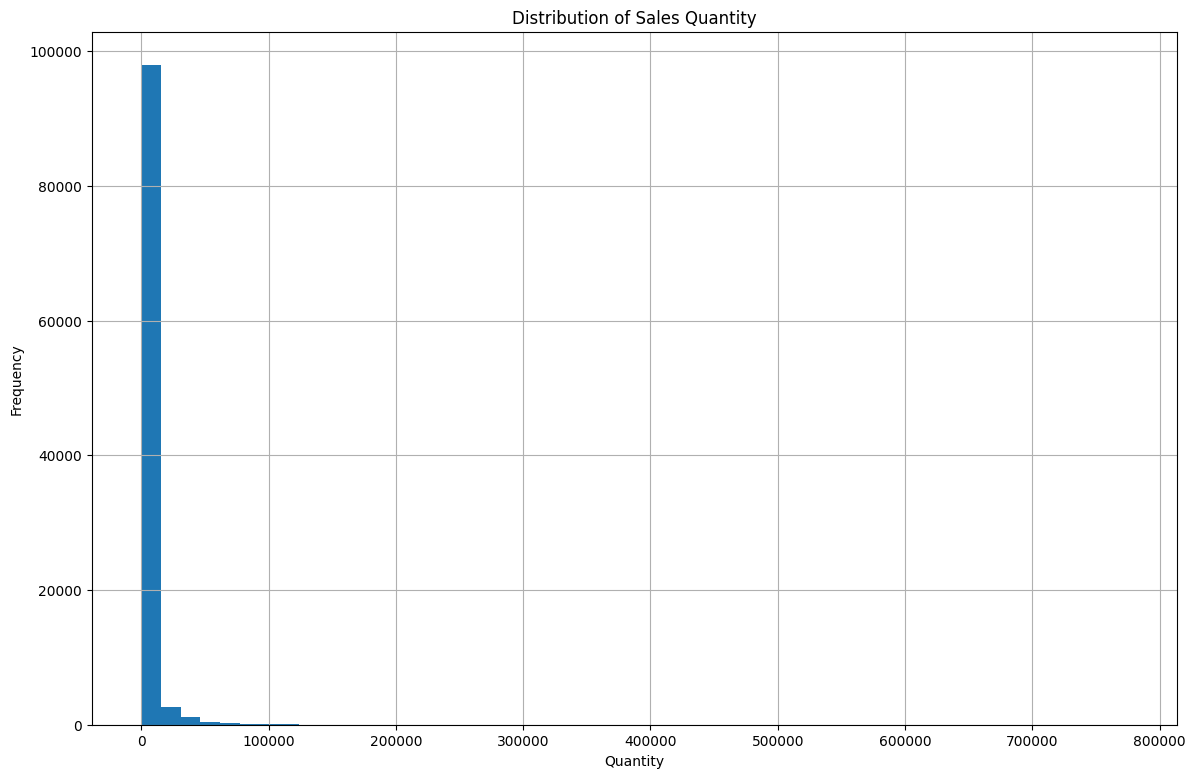

In [43]:
df['quantity'].hist(bins=50)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Quantity')
plt.show()

Dari histogram, kita dapat melihat bahwa distribusi data memiliki skewness positif, yang berarti data cenderung terkumpul di sekitar nilai-nilai yang lebih rendah.

In [44]:
# Konversi kolom 'week_start_date' menjadi datetime dan jadikan sebagai index
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df.set_index('week_start_date', inplace=True)

# Resample data per minggu dan jumlahkan quantity
df_weekly = df['quantity'].resample('W').sum()

# Reset index dan ubah nama kolom
df_weekly = df_weekly.reset_index()
df_weekly.columns = ['date', 'quantity']

# Tampilkan dataframe baru
print(df_weekly)

         date  quantity
0  2022-01-02    128808
1  2022-01-09   3839557
2  2022-01-16   4138934
3  2022-01-23   4149077
4  2022-01-30   4824273
..        ...       ...
62 2023-03-12   4775638
63 2023-03-19   4787111
64 2023-03-26   4757590
65 2023-04-02   6001166
66 2023-04-09   4172070

[67 rows x 2 columns]


Saya mengkonversi kolom 'week_start_date' menjadi tipe data datetime dan menjadikannya sebagai index. Kemudian, data di-resample per minggu dan dijumlahkan quantity-nya, kemudian di-reset index dan diubah nama kolom menjadi 'date' dan 'quantity'.

Dengan data yang sudah diubah frekuensi per minggu, kita dapat melihat pola jumlah quantity produk yang terjual setiap minggunya. Hal ini dapat memberikan insight kepada kita mengenai periode-periode waktu tertentu di mana penjualan produk tersebut meningkat atau menurun secara signifikan, dan dapat membantu dalam perencanaan produksi dan pemasaran.

In [45]:
# Create A New DataFrame with `date` as Index and `sales`

sales = df_weekly.set_index('date')['quantity']
sales

date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-03-12    4775638
2023-03-19    4787111
2023-03-26    4757590
2023-04-02    6001166
2023-04-09    4172070
Name: quantity, Length: 67, dtype: int64

Saya membuat sebuah DataFrame baru dengan date sebagai index dan quantity sebagai kolom nilai penjualan (sales).

Saya mengubah DataFrame df_weekly yang awalnya berisi data penjualan dengan bentuk yang tidak teratur, menjadi sebuah DataFrame yang mudah digunakan dan diolah dalam proses analisis dan pemodelan.

 Dalam konteks analisis time series, DataFrame dengan index berupa tanggal sangat berguna untuk memvisualisasikan dan menganalisis trend, seasonal, serta melakukan peramalan (forecasting) pada data penjualan.

<Axes: xlabel='date'>

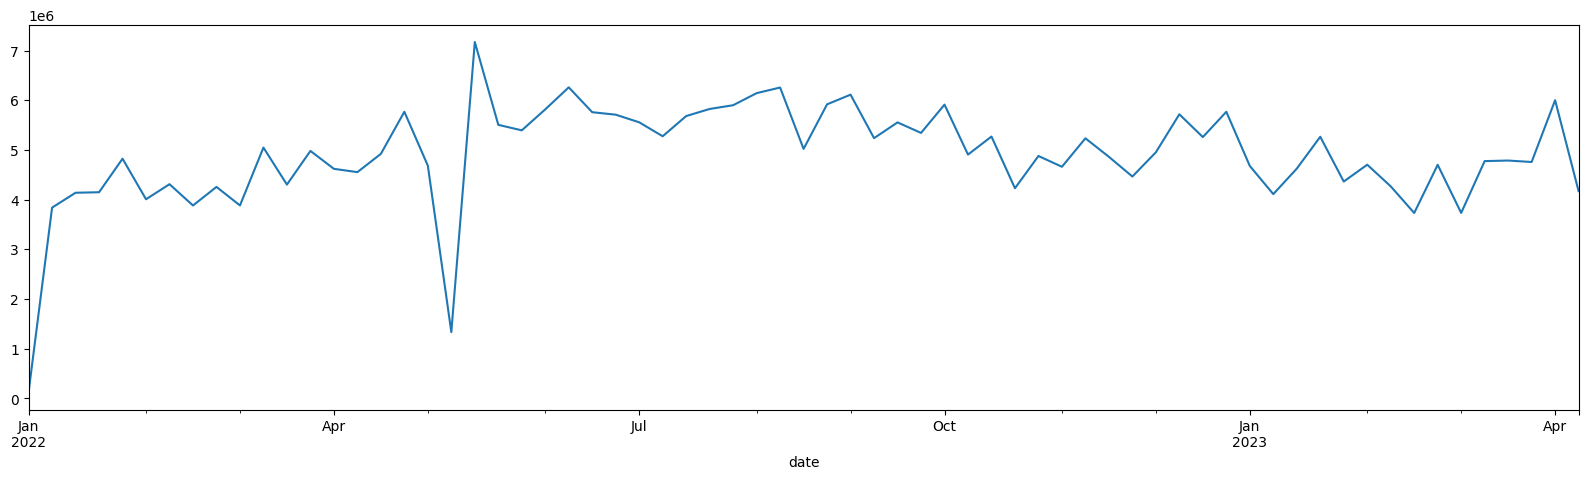

In [46]:
# Trend Visualization

sales.plot(figsize=(20,5))

Dalam analisis time series pada data penjualan, dilakukan visualisasi tren penjualan dari Januari 2022 hingga April 2023. Dari grafik yang dihasilkan, tidak terlihat adanya tren yang signifikan karena selama periode tersebut penjualan mengalami fluktuasi yang wajar. Meski demikian, terlihat adanya penurunan yang drastis pada bulan Mei 2022.

Melalui analisis lebih lanjut, ditemukan bahwa penurunan tersebut terjadi pada awal bulan Mei 2022, yakni saat terjadi hari raya Idul Fitri dan libur serta cuti bersama. Penurunan penjualan ini disebabkan oleh berkurangnya waktu operasional selama libur, sehingga penjualan mengalami penurunan yang signifikan. Namun, setelah periode liburan berakhir, penjualan langsung meningkat kembali

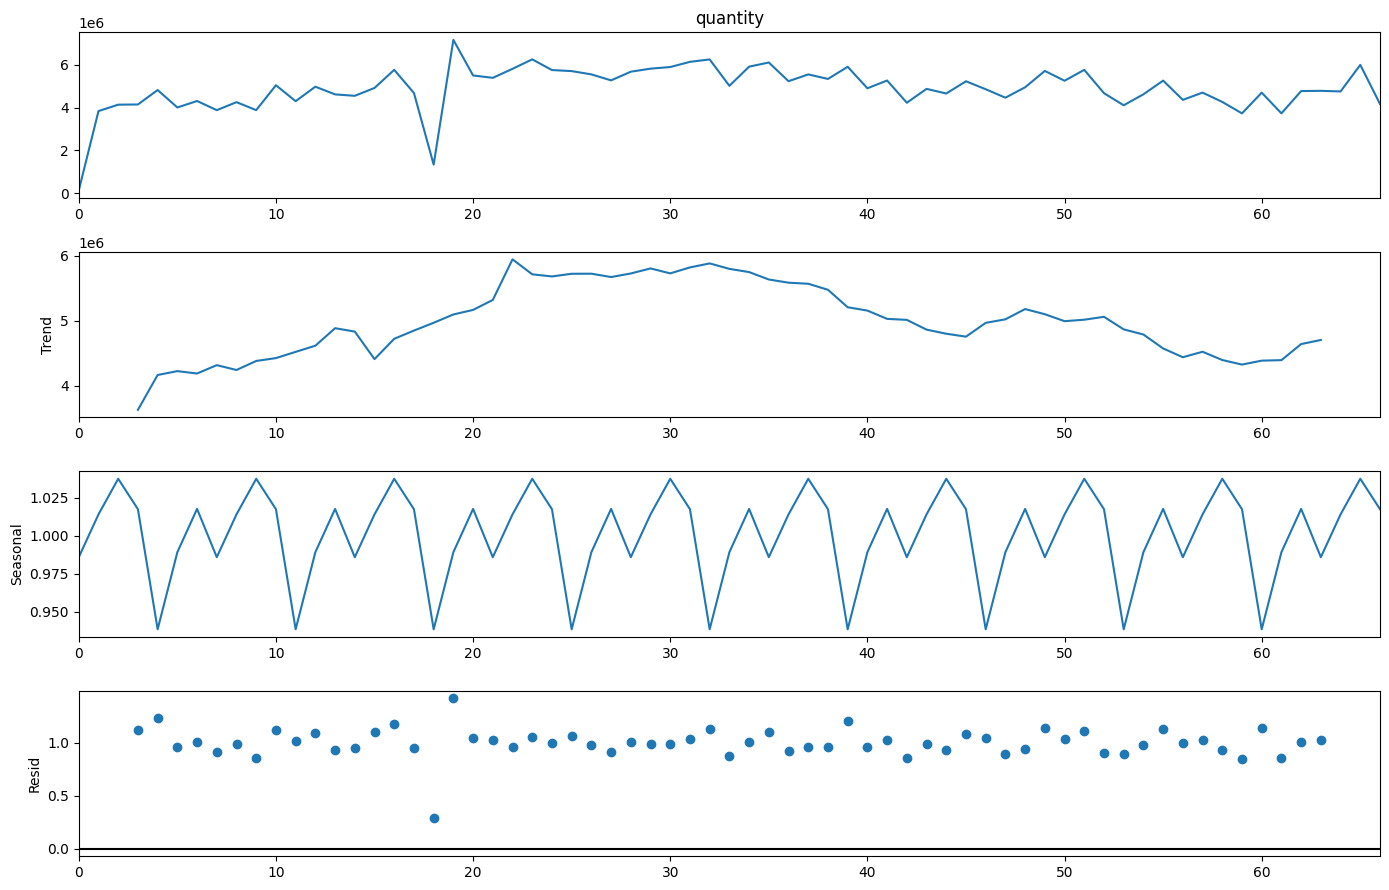

In [47]:
pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(df_weekly['quantity'], model='multiplicative', period=7) 
ax = res.plot()
plt.show()

- Dari plot hasil seasonal decomposition, terlihat bahwa tidak terdapat pola musiman yang jelas pada data quantity setiap minggunya. Hal ini disebabkan oleh fluktuasi penurunan dan kenaikan yang tidak membentuk pola yang konsisten.

- Terlihat adanya penurunan yang ekstrim pada minggu pertama bulan Mei yang disebabkan oleh adanya libur panjang yang terkait dengan perayaan hari besar.

- Pada plot hasil trend decomposition, terlihat adanya kenaikan jumlah penjualan pada minggu ke-2 hingga ke-15, namun terjadi penurunan pada minggu-minggu selanjutnya akibat adanya libur yang membatasi operasional. Setelah itu, terjadi penurunan jumlah penjualan yang disusul oleh kenaikan dan berangsur menurun hingga akhir periode minggu.

- Pada plot hasil residual decomposition, terlihat adanya fluktuasi pada data quantity yang tidak dapat dijelaskan oleh trend atau seasonal.

## 4.5 Data Preprocessing

In [48]:
# Display 10 First Data

sales.head(10)

date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
2022-02-06    4008027
2022-02-13    4311010
2022-02-20    3882636
2022-02-27    4256541
2022-03-06    3883810
Name: quantity, dtype: int64

### 4.5.1 Create A New Dataset with `window=2`

In [49]:
window = 2
X = []
y = []

for index in range(0, len(sales)-window):
  X.append(sales[index : window + index])
  y.append(sales[window + index])

X = np.array(X)
y = np.array(y)

print('X : ', X, X.shape)
print('y : ', y, y.shape)

X :  [[ 128808 3839557]
 [3839557 4138934]
 [4138934 4149077]
 [4149077 4824273]
 [4824273 4008027]
 [4008027 4311010]
 [4311010 3882636]
 [3882636 4256541]
 [4256541 3883810]
 [3883810 5047898]
 [5047898 4303200]
 [4303200 4980761]
 [4980761 4620208]
 [4620208 4553719]
 [4553719 4921338]
 [4921338 5768747]
 [5768747 4684319]
 [4684319 1334134]
 [1334134 7172144]
 [7172144 5505616]
 [5505616 5394786]
 [5394786 5817233]
 [5817233 6260083]
 [6260083 5759699]
 [5759699 5709933]
 [5709933 5556481]
 [5556481 5275889]
 [5275889 5682207]
 [5682207 5824993]
 [5824993 5900392]
 [5900392 6143352]
 [6143352 6256332]
 [6256332 5021634]
 [5021634 5918497]
 [5918497 6112693]
 [6112693 5237531]
 [5237531 5554898]
 [5554898 5343014]
 [5343014 5912301]
 [5912301 4907074]
 [4907074 5269967]
 [5269967 4229764]
 [4229764 4878485]
 [4878485 4661839]
 [4661839 5234579]
 [5234579 4861820]
 [4861820 4465411]
 [4465411 4953197]
 [4953197 5717901]
 [5717901 5259200]
 [5259200 5768419]
 [5768419 4677997]
 [46779

### 4.5.2 Combines `X` and `y` into One DataFrame

In [50]:
X_y_df = pd.concat([pd.DataFrame(X, columns=['X0', 'X1']), pd.DataFrame(y, columns=['y'])], axis=1)
X_y_df

,X0,X1,y
0,128808,3839557,4138934
1,3839557,4138934,4149077
2,4138934,4149077,4824273
3,4149077,4824273,4008027
4,4824273,4008027,4311010
...,...,...,...
60,4701262,3732954,4775638
61,3732954,4775638,4787111
62,4775638,4787111,4757590
63,4787111,4757590,6001166


### 4.5.3 Splitting Dataset into Train-set and Test-set

In [51]:
# Splitting Dataset

train_size = round(len(X)*0.80)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

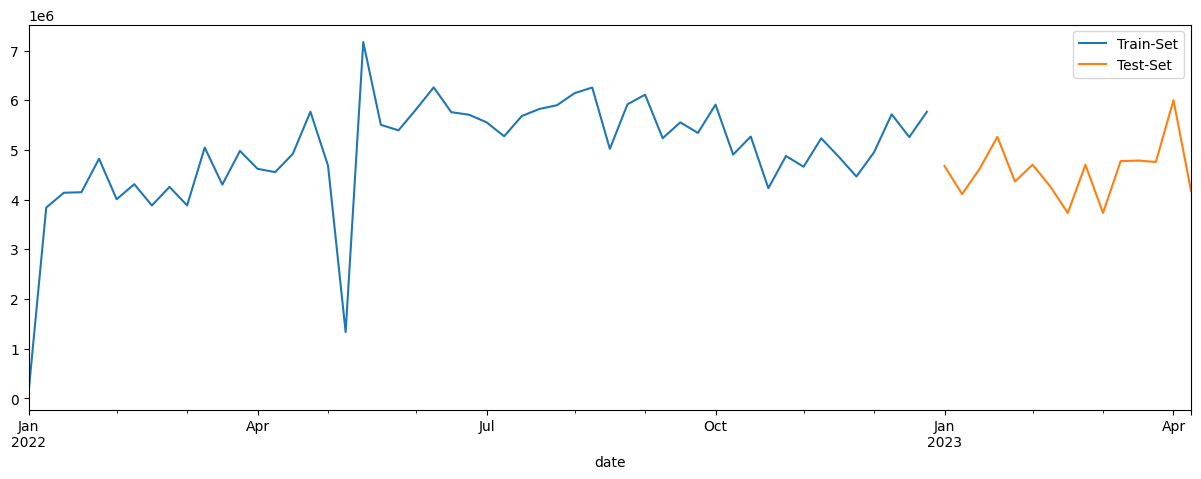

In [52]:
# Trend Visualization of train-set and test-set

import matplotlib.pyplot as plt

sales[:train_size].plot.line(figsize=(15, 5))
sales[train_size:].plot.line(figsize=(15,5))
plt.legend(['Train-Set', 'Test-Set'])

### 4.5.4 Feature Scaling

In [53]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.6 Model Training & Evaluation

Saya melakukan analisis time series menggunakan tiga model linear regression, yaitu model linear regression standar, model linear regression dengan regularisasi Ridge, dan model linear regression dengan regularisasi Lasso. Ketiga model ini digunakan untuk membandingkan performa masing-masing dalam melakukan prediksi terhadap data time series. Setelah melakukan evaluasi terhadap ketiga model, model yang memberikan hasil terbaik akan dipilih untuk digunakan dalam melakukan forecasting pada periode yang selanjutnya pada proyek ini

### 4.6.1 Base Model Linear Regression

In [54]:
# Model Training

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train_scaled,y_train)

y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train,y_pred_train))
print('Test MAE:',mean_absolute_error(y_test,y_pred_test))

Train MAE: 569021.6492159483
Test MAE: 531353.6376728999


- Dari nilai Train MAE dan Test MAE yang diperoleh Untuk Base model linear regression, dapat dilihat bahwa nilai Test MAE = 531353.6376728999 hampir sama dengan nilai Train MAE = 569021.6492159483. Hal ini menunjukkan bahwa model tidak terlalu overfitting dan cenderung good-fit dan juga model memiliki performa yang cukup baik dalam memprediksi data baru yang belum pernah dilihat sebelumnya. 



### 4.6.2 Model Linear regression dengan regularisasi Ridge

In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

model_ridge = Ridge(alpha=0.1, fit_intercept=True)
model_ridge.fit(X_train_scaled, y_train)

y_pred_train1 = model_ridge.predict(X_train_scaled)
y_pred_test1 = model_ridge.predict(X_test_scaled)

print('Train MAE:', mean_absolute_error(y_train, y_pred_train1))
print('Test MAE:', mean_absolute_error(y_test, y_pred_test1))

Train MAE: 570418.5571823191
Test MAE: 537630.6771362785


- Model Ridge ini adalah model regresi linier dengan regularisasi L2, yang bertujuan untuk mengontrol nilai koefisien agar tidak terlalu besar. Pada model Ridge ini, digunakan alpha=0.1 sebagai hyperparameter yang mengatur kekuatan regularisasi. Hasil dari model tersebut menunjukkan nilai Train MAE sebesar 570,418.557 dan Test MAE sebesar 537,630.677.

- Dari hasil tersebut, terlihat bahwa nilai Train MAE dan Test MAE dari model Ridge tidak jauh berbeda dan tidak terlalu tinggi, sehingga dapat disimpulkan bahwa model tidak mengalami overfitting atau underfitting. Namun, dibandingkan dengan model Linear Regression tanpa regularisasi, terdapat sedikit peningkatan pada nilai MAE pada model Ridge.

### 4.6.3 Model Linear regression dengan regularisasi Lasso

In [56]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1, fit_intercept=True)
model_lasso.fit(X_train_scaled, y_train)

y_pred_train2 = model_lasso.predict(X_train_scaled)
y_pred_test2 = model_lasso.predict(X_test_scaled)

print('Train MAE:', mean_absolute_error(y_train, y_pred_train2))
print('Test MAE:', mean_absolute_error(y_test, y_pred_test2))

Train MAE: 569021.7436829377
Test MAE: 531353.7621107731


- Model Lasso ini adalah model regresi linier dengan regularisasi L1, yang bertujuan untuk mengontrol nilai koefisien dengan cara memperkuat beberapa koefisien dan menekan yang lain menjadi nol. Pada model Lasso di atas, digunakan alpha=0.1 sebagai hyperparameter yang mengatur kekuatan regularisasi. Hasil dari model tersebut menunjukkan nilai Train MAE sebesar 569,021.744 dan Test MAE sebesar 531,353.762.

- Dari hasil tersebut, terlihat bahwa nilai Train MAE dan Test MAE dari model Lasso tidak jauh berbeda dan lebih rendah dibandingkan dengan model Linear Regression dan model Ridge. Hal ini menunjukkan bahwa model Lasso dapat memberikan performa yang lebih baik dalam memprediksi nilai Sales. Pengaruh dari regularisasi L1 pada model Lasso dapat menghasilkan model yang lebih parsimonius dengan menghilangkan beberapa fitur yang tidak berkontribusi signifikan pada prediksi. Selain itu, hyperparameter alpha juga dapat diatur untuk mendapatkan nilai MAE yang lebih optimal.

In [57]:
# Combines All Prediction into One NumPy Array

y_pred_all = np.concatenate([np.array([0, 0]), y_pred_train2, y_pred_test2], axis=0)
y_pred_all

array([      0.        ,       0.        , 3998866.07896009,
       4729520.70487576, 4786429.12405343, 4886600.26290631,
       4892790.97523194, 4785764.47988873, 4779502.53462766,
       4754617.98351941, 4769588.11038264, 4870038.83048898,
       4977167.20656382, 4937918.3303156 , 5010885.41378725,
       4934447.12460323, 4975653.11732312, 5167083.81176633,
       5166119.85144875, 4477619.83351696, 4707189.37536056,
       5545531.07139189, 5220826.97084695, 5261804.60698879,
       5404492.57090818, 5413645.01031448, 5313750.47993547,
       5282196.84273489, 5212936.31305705, 5220133.26599168,
       5316152.37547395, 5353566.61180153, 5402896.70229872,
       5464329.81752358, 5305505.10887598, 5207454.51973598,
       5401785.72592164, 5310338.96590695, 5194497.72564756,
       5222415.07321258, 5266058.36995382, 5225127.95054394,
       5091831.77283241, 5007594.29683681, 4909432.07499405,
       4998008.78905801, 5041273.04463336, 5093054.8427361 ,
       4966327.72064604,

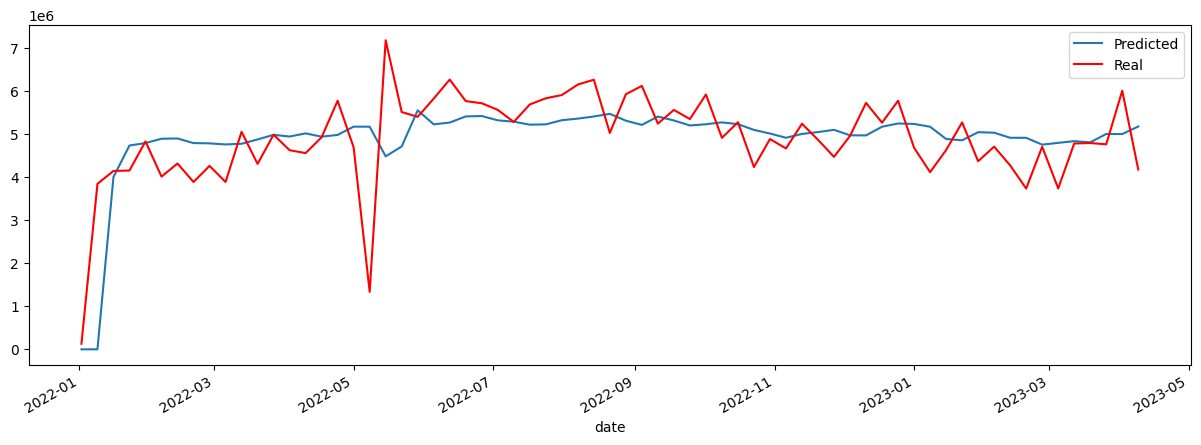

In [58]:
# Trend Visualization between Real Values and Predicted Values

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(sales.index, y_pred_all,label='Predicted')
sales.plot(color='red',label='Real')
plt.legend()

- Berdasarkan grafik perbandingan antara data asli dan hasil prediksi, terdapat satu kesamaan pada minggu pertama di bulan Mei, di mana keduanya mengalami penurunan yang cukup signifikan. Namun, pada umumnya, terlihat bahwa tren pada kedua grafik sangat fluktuatif dan tidak memiliki pola yang pasti.

- Grafik data asli menunjukkan pergerakan yang fluktuatif dan tidak memiliki pola yang konsisten. Sementara itu, grafik hasil prediksi terlihat lebih smooth dan stabil dalam pergerakannya, meskipun masih memiliki fluktuasi yang tidak terlalu besar. Walaupun begitu, pada umumnya grafik hasil prediksi masih mengikuti tren dari data asli.

### 4.6.4 Model Analysis

In [59]:
sales.describe()

count    6.700000e+01
mean     4.893709e+06
std      1.044440e+06
min      1.288080e+05
25%      4.337716e+06
50%      4.907074e+06
75%      5.619344e+06
max      7.172144e+06
Name: quantity, dtype: float64

> Best Model:

- Dari tiga model yang telah dibuat, yaitu base model linear regression, linear regression dengan regularisasi menggunakan ridge, dan linear regression dengan regularisasi dengan lasso, semuanya memiliki nilai train-set sekitar 569.000 dan test-set sekitar 530.000. Dapat dikatakan bahwa model yang dibuat merupakan good-fit, mengingat nilai MAE untuk train-set dan test-set tidak memiliki perbedaan yang signifikan. Selain itu, karena jumlah rata-rata penjualan sebesar 4.800.000, nilai error sekitar 500.000 masih dianggap wajar karena nilai errornya hanya sekitar 10%.

- Dari ketiga model tersebut, model Linear regression dengan regularisasi lasso dipilih karena terlihat bahwa nilai Train MAE dan Test MAE dari model Lasso tidak jauh berbeda dan lebih rendah dibandingkan dengan model Linear Regression dan model Ridge. Hal ini menunjukkan bahwa model Lasso dapat memberikan performa yang lebih baik dalam memprediksi nilai Sales. Pengaruh dari regularisasi L1 pada model Lasso dapat menghasilkan model yang lebih parsimonius dengan menghilangkan beberapa fitur yang tidak berkontribusi signifikan pada prediksi.

## 4.7 Model Saving

In [60]:
# Import library joblib
import joblib

# Save model
joblib.dump(model_lasso, 'model_lasso.pkl')

# Load model
model_lasso = joblib.load('model_lasso.pkl')

## 4.8 Model Inference

In [61]:
def forecasting(week):
  # :param `week` : how many weeks to predict

  sales_forecast = sales.copy()
  window = 2
  for i in range(week):
    X = np.array(sales_forecast[-window:].values).reshape(1, -1)
    X_scaled = scaler.transform(X)
    new_idx = sales_forecast.index[-1] + timedelta(weeks=1)
    sales_forecast[new_idx] = round(model_lasso.predict(X_scaled)[0])

    print('i : ', i)
    print('X : ', X)
    print('X_scaled : ', X_scaled)
    print('new_idx : ', new_idx)
    print('sales_forecast[new_idx] : ', sales_forecast[new_idx])
    print('')

  return sales_forecast

In [62]:
# Displax `sales` DataFrame

sales

date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-03-12    4775638
2023-03-19    4787111
2023-03-26    4757590
2023-04-02    6001166
2023-04-09    4172070
Name: quantity, Length: 67, dtype: int64

i :  0
X :  [[6001166 4172070]]
X_scaled :  [[0.83374668 0.48611359]]
new_idx :  2023-04-16 00:00:00
sales_forecast[new_idx] :  5134582

i :  1
X :  [[4172070 5134582]]
X_scaled :  [[0.57405496 0.65098347]]
new_idx :  2023-04-23 00:00:00
sales_forecast[new_idx] :  4936031

i :  2
X :  [[5134582 4936031]]
X_scaled :  [[0.71071066 0.61697342]]
new_idx :  2023-04-30 00:00:00
sales_forecast[new_idx] :  5085343

i :  3
X :  [[4936031 5085343]]
X_scaled :  [[0.68252075 0.64254926]]
new_idx :  2023-05-07 00:00:00
sales_forecast[new_idx] :  5070316



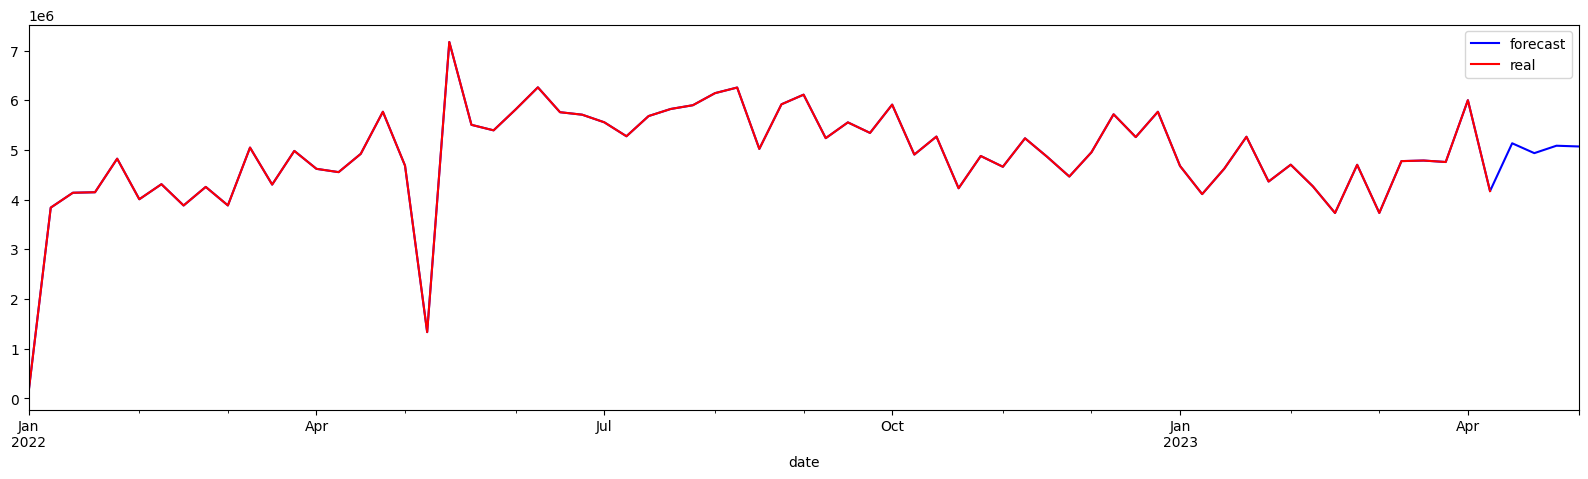

In [63]:
# Forecast for the Next Months

sales_forecast = forecasting(4)
sales_forecast.plot(color='blue',label='forecast',figsize=(20,5))
sales.plot(color='red',label='real')
plt.legend()

In [64]:
# Display Forecasted DataFrame

sales_forecast

date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-04-09    4172070
2023-04-16    5134582
2023-04-23    4936031
2023-04-30    5085343
2023-05-07    5070316
Name: quantity, Length: 71, dtype: int64

> Insight: 

- Berdasarkan hasil forecast selama 4 minggu ke depan, dapat dilihat bahwa prediksi penjualan cukup stabil dan cenderung naik turun secara fluktuatif. Prediksi penjualan untuk minggu pertama adalah 5.134.582, diikuti dengan penurunan pada minggu kedua menjadi 4.936.031, lalu naik lagi pada minggu ketiga menjadi 5.085.343, dan akhirnya turun lagi pada minggu keempat menjadi 5.070.316.

- Kendati fluktuatif, penjualan pada 4 minggu ke depan terlihat masih berada di kisaran yang wajar dan tidak menunjukkan tren penurunan yang signifikan. Oleh karena itu, dapat disimpulkan bahwa prediksi penjualan ini dapat membantu manajemen dalam membuat keputusan bisnis terkait strategi penjualan di masa yang akan datang. Namun, perlu diingat bahwa prediksi ini hanya berdasarkan pada data historis dan perubahan lingkungan bisnis dapat memengaruhi hasil aktual di masa depan.

## 5 - Conclusion / Overall Analysis

## 5.1 Model Analysis

> Penggunaan Metrics:

- Pada project pembuatan model time series ini, MAE (Mean Absolute Error) dipilih sebagai metrics evaluasi karena MAE memberikan perhitungan kesalahan prediksi yang sederhana dan mudah dipahami. MAE menghitung selisih absolut antara nilai aktual dan nilai prediksi, kemudian dihitung rata-ratanya. Sehingga, MAE memberikan informasi tentang besarnya kesalahan prediksi secara keseluruhan, yang akan membantu untuk mengevaluasi kualitas dan akurasi dari model time series yang dibuat. Selain itu, MAE juga relatif stabil terhadap adanya pencilan (outlier) yang terdapat pada data, sehingga lebih baik digunakan daripada metrics evaluasi lain seperti MSE (Mean Squared Error) yang lebih sensitif terhadap adanya outlier.

> Performansi Model:

- Saya melakukan analisis time series menggunakan tiga model linear regression, yaitu model linear regression standar, model linear regression dengan regularisasi Ridge, dan model linear regression dengan regularisasi Lasso. Ketiga model ini digunakan untuk membandingkan performa masing-masing dalam melakukan prediksi terhadap data time series. Setelah melakukan evaluasi terhadap ketiga model, model yang memberikan hasil terbaik akan dipilih untuk digunakan dalam melakukan forecasting pada periode yang selanjutnya pada proyek ini.

- Dari tiga model yang telah dibuat, yaitu base model linear regression, linear regression dengan regularisasi menggunakan ridge, dan linear regression dengan regularisasi dengan lasso, semuanya memiliki nilai train-set sekitar 569.000 dan test-set sekitar 530.000. Dapat dikatakan bahwa model yang dibuat merupakan good-fit, mengingat nilai MAE untuk train-set dan test-set tidak memiliki perbedaan yang signifikan. Selain itu, karena jumlah rata-rata penjualan sebesar 4.800.000, nilai error sekitar 500.000 masih dianggap wajar karena nilai errornya hanya sekitar 10%.

> Kelebihan dan Kekurangan Model:

- Berikut adalah kelebihan dan kekurangan dari Model yang telah saya buat:

    Kelebihan:

  1. Model-memberikan hasil prediksi yang akurat, karena nilai MAE untuk train-set dan test-set tidak memiliki perbedaan yang signifikan.
  2. Dapat dikatakan model ini relatif robust, karena model-memberikan nilai error sekitar 500.000 yang masih dianggap wajar, mengingat rata-rata penjualan sebesar 4.800.000.

    Kekurangan:

  1. Dapat terjadi overfitting, karena model-memberikan nilai MAE yang serupa untuk train-set dan test-set.
  2. Model ini mungkin tidak sensitif terhadap perubahan data atau tren baru, karena tidak ada penyesuaian pada parameter model setelah pelatihan awal.


> Keterkaitan dengan domain bisnis:

- Berdasarkan hasil forecast selama 4 minggu ke depan, dapat dilihat bahwa prediksi penjualan cukup stabil dan cenderung naik turun secara fluktuatif. Prediksi penjualan untuk minggu pertama adalah 5.134.582, diikuti dengan penurunan pada minggu kedua menjadi 4.936.031, lalu naik lagi pada minggu ketiga menjadi 5.085.343, dan akhirnya turun lagi pada minggu keempat menjadi 5.070.316.

- Kendati fluktuatif, penjualan pada 4 minggu ke depan terlihat masih berada di kisaran yang wajar dan tidak menunjukkan tren penurunan yang signifikan. Oleh karena itu, dapat disimpulkan bahwa prediksi penjualan ini dapat membantu manajemen dalam membuat keputusan bisnis terkait strategi penjualan di masa yang akan datang. Namun, perlu diingat bahwa prediksi ini hanya berdasarkan pada data historis dan perubahan lingkungan bisnis dapat memengaruhi hasil aktual di masa depan.

- Hasil prediksi untuk keempat minggu tersebut menunjukkan nilai yang lebih tinggi daripada nilai rata-rata penjualan sebelumnya, yaitu sebesar 4.800.000. Hal ini perlu menjadi perhatian bagi manajemen, terutama jika ingin menggunakan model ini untuk keperluan perencanaan bisnis. Kecenderungan model untuk memberikan prediksi yang lebih tinggi dari data aktual dapat diatasi dengan mengalokasikan cadangan atau buffer untuk menangani kesalahan prediksi. Ini akan membantu manajemen dalam membuat keputusan bisnis yang lebih akurat dan tepat.


## 5.1 Overall Analysis

> Analisis EDA: 

- Dari plot histogram unruk melihat distribusi data, kita dapat melihat bahwa distribusi data memiliki skewness positif, yang berarti data cenderung terkumpul di sekitar nilai-nilai yang lebih rendah.

- Dalam analisis time series pada data penjualan, dilakukan visualisasi tren penjualan dari Januari 2022 hingga April 2023. Dari grafik yang dihasilkan, tidak terlihat adanya tren yang signifikan karena selama periode tersebut penjualan mengalami fluktuasi yang wajar. Meski demikian, terlihat adanya penurunan yang drastis pada bulan Mei 2022.

- Melalui analisis lebih lanjut, ditemukan bahwa penurunan tersebut terjadi pada awal bulan Mei 2022, yakni saat terjadi hari raya Idul Fitri dan libur serta cuti bersama. Penurunan penjualan ini disebabkan oleh berkurangnya waktu operasional selama libur, sehingga penjualan mengalami penurunan yang signifikan. Namun, setelah periode liburan berakhir, penjualan langsung meningkat kembali

- Pada plot hasil trend decomposition, terlihat adanya kenaikan jumlah penjualan pada minggu ke-2 hingga ke-15, namun terjadi penurunan pada minggu-minggu selanjutnya akibat adanya libur yang membatasi operasional. Setelah itu, terjadi penurunan jumlah penjualan yang disusul oleh kenaikan dan berangsur menurun hingga akhir periode minggu.

- Pada plot hasil residual decomposition, terlihat adanya fluktuasi pada data quantity yang tidak dapat dijelaskan oleh trend atau seasonal.

> Overall Analysis 2:

Berikut adalah penjelasan mengenai flow pekerjaan pada project pembuatan model time series yang saya buat:

- Data loading: Pada tahap ini, saya memuat dataset yang diberikan yaitu `sample_dataset_timeseries_noarea.csv.`

- Data cleaning: Pada tahap ini, saya melakukan pembersihan data dengan mengatasi missing value. Dalam dataset tersebut terdapat hanya dua data missing value, sehingga saya memilih untuk menghapus data tersebut. Selanjutnya, saya melakukan pengecekan terhadap adanya duplikasi pada data dan tidak ditemukan adanya data duplikat.

- EDA: Pada tahap ini, saya melakukan eksplorasi data untuk mengetahui karakteristik dari data dan melihat adanya anomali pada data.

- Data preprocessing: Pada tahap ini, saya melakukan proses transformasi pada data, seperti mengubah tipe data dan normalisasi data, serta membagi data menjadi data train dan data test.

- Model training dan evaluation: Pada tahap ini, saya membuat model dengan menggunakan algoritma linear regression sebagai baseline model karena model ini mudah dipahami dan memiliki interpretasi yang sederhana. Selain itu, saya juga mencoba menggunakan regularisasi ridge dan lasso untuk mengurangi overfitting dan meningkatkan performa model. Ridge regularization dapat mengurangi nilai koefisien yang besar, sedangkan Lasso regularization dapat menghilangkan koefisien yang tidak penting. Dalam konteks time series, regularisasi dapat membantu mengatasi masalah multicollinearity dan memperbaiki kemampuan prediksi. Setelah membuat model, saya melakukan evaluasi terhadap performa model dengan menggunakan metrik yang sesuai dengan jenis data time series.

- Model analysis: Pada tahap ini, saya melakukan analisis terhadap hasil dari model untuk memperoleh insight dan menyimpulkan hasil dari model yang dibuat.

- Model saving: Pada tahap ini, saya menyimpan model yang telah dibuat ke dalam format yang sesuai untuk memudahkan penggunaan model pada waktu yang akan datang.

- Pembuatan inference: Pada tahap ini, saya menggunakan model yang telah dibuat untuk melakukan prediksi pada data baru atau data masa depan.

> Further Improvement

- Secara keseluruhan, model yang kita latih sudah Good-Fit. Namun, kita dapat meningkatkan model dengan mengurangi skor MAE melalui eksplorasi algoritma lain seperti menggunakan random forest, XG boost dll. atau penyesuaian parameter model.